In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [7]:
img = cv2.imread(r"C:\Users\achyu\Downloads\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\car_plate.jpg")

In [8]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

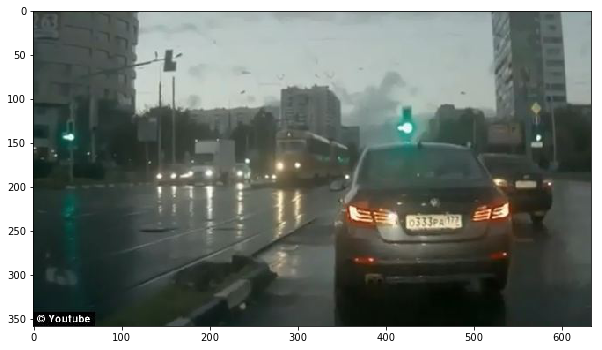

In [9]:
display(img)

In [10]:
plate_cascade = cv2.CascadeClassifier(r"C:\Users\achyu\Downloads\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_russian_plate_number.xml")

In [16]:
def detect_plate(img):
    
    plate_img = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor = 1.2, minNeighbors = 5)
    
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(255,255,255),5)
        
    return plate_img

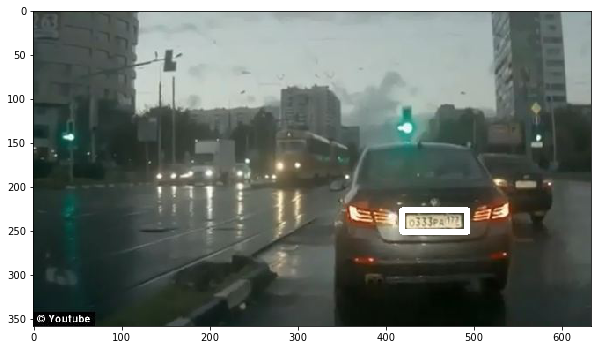

In [17]:
result = detect_plate(img)
display(result)

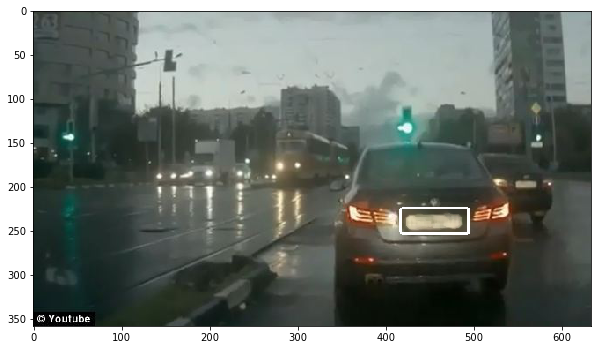

In [20]:
def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor = 1.2, minNeighbors = 5)
    
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(255,255,255),5)
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img


result = detect_and_blur_plate(img)
display(result)